In [1]:
import math
import random
import numpy as np
import matplotlib.pyplot as plt

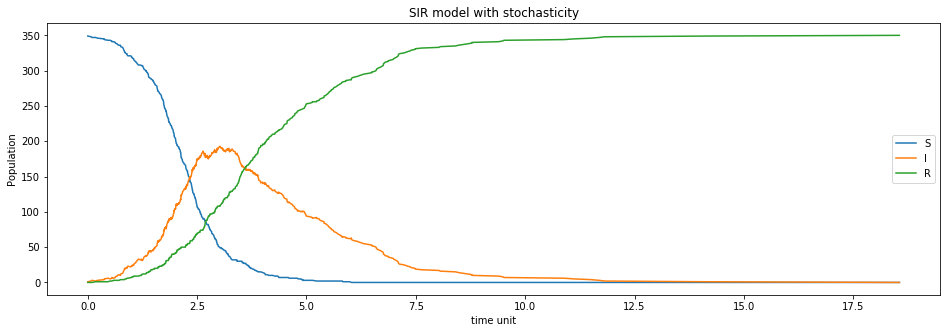

In [2]:
T = 100.0
t = 0.0

beta = 3.0 
gamma = 0.5

N = 350
I = 1
S = N - I
R = 0

SIR_data = []
SIR_data.append((t, S, I, R))
# main loop
while t < T:
    if I == 0:
        break

    rate1 = beta*S*I / N
    rate2 = gamma*I
    R_sum = rate1 + rate2

    dt = -math.log(random.uniform(0.0,1.0)) / R_sum
    t = t + dt
    
    if random.uniform(0.,1.) < rate1 / R_sum:
        S = S - 1
        I = I + 1

    else:
        I = I - 1
        R = R + 1

    SIR_data.append((t, S, I, R))
    
SIR_data = np.asarray(SIR_data)
time = SIR_data[:,0]
S_ = SIR_data[:,1]
I_ = SIR_data[:,2]
R_ = SIR_data[:,3]

fig, ax = plt.subplots(figsize=(16,5))
ax.plot(time, S_, label = "S")
ax.plot(time, I_, label = "I")
ax.plot(time, R_, label = "R")
ax.set_title("SIR model with stochasticity")
ax.set_xlabel("time unit")
ax.set_ylabel("Population")
plt.legend()

# demography

Text(0.5, 1.0, 'R')

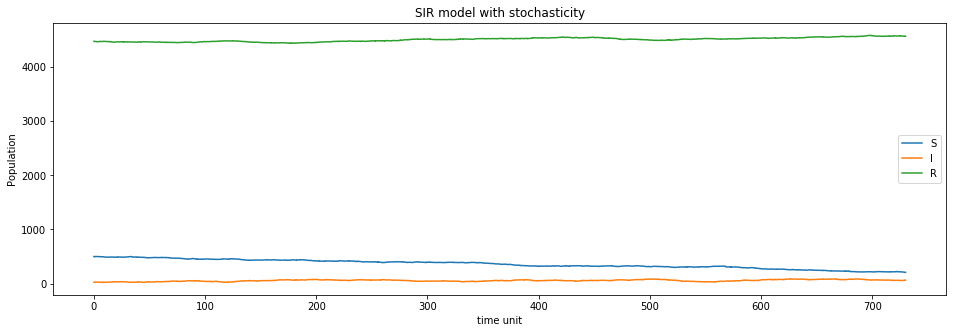

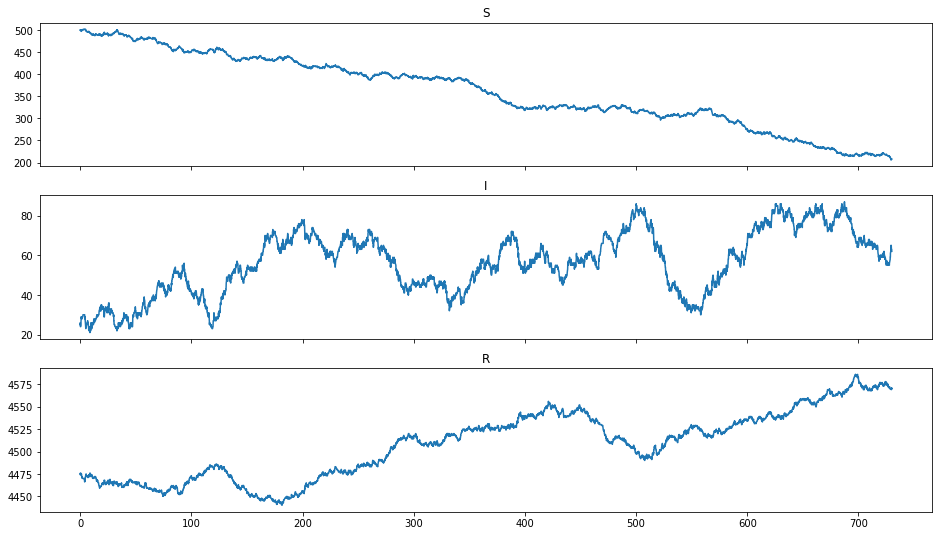

In [168]:
T = 2*365
t = 0.0

beta = 1
gamma = 1/10
mu = 5e-4

N = 5000
S = gamma*N/beta
I = mu*N/gamma
R = N - S - I

timeseries = []
timeseries.append(t)
SIR_data = []
SIR_data.append((S, I, R))

d = np.zeros((6,3))
d[0] = [-1, +1, 0] 
d[1] = [0, -1, +1]
d[2] = [+1, 0, 0]
d[3] = [-1, 0 ,0]
d[4] = [0, -1, 0]
d[5] = [0, 0, -1]

# main loop
while t < T:
    if I == 0:
        break
    elif S < 0:
        break
    
    #rates
    rate = np.zeros((6))
    rate[0] = beta*S*I / N
    rate[1] = gamma*I
    rate[2] = mu*N
    rate[3] = mu*S
    rate[4] = mu*I
    rate[5] = mu*R
    
    #timestep
    R_sum = np.sum(rate)
    dt = -math.log(random.uniform(0.0,1.0)) / R_sum
    t = t + dt
    
    timeseries.append(t)
    
    #calculate which event triggers
    event = np.min(np.where(np.cumsum(rate) > random.uniform(0.,1.)*R_sum))
    
    SIR_data.append([sum(i) for i in zip(SIR_data[-1],d[event])])
    
SIR_data = np.asarray(SIR_data)
S_ = SIR_data[:,0]
I_ = SIR_data[:,1]
R_ = SIR_data[:,2]

fig, ax = plt.subplots(figsize=(16,5))
ax.plot(timeseries, S_, label = "S")
ax.plot(timeseries, I_, label = "I")
ax.plot(timeseries, R_, label = "R")
ax.set_title("SIR model with stochasticity")
ax.set_xlabel("time unit")
ax.set_ylabel("Population")
plt.legend()

fig, (ax1,ax2,ax3) = plt.subplots(3, sharex=True, figsize=(16,9))
ax1.plot(timeseries, S_)
ax1.set_title("S")
ax2.plot(timeseries, I_)
ax2.set_title("I")
ax3.plot(timeseries, R_)
ax3.set_title("R")

Text(0.5, 1.0, 'R')

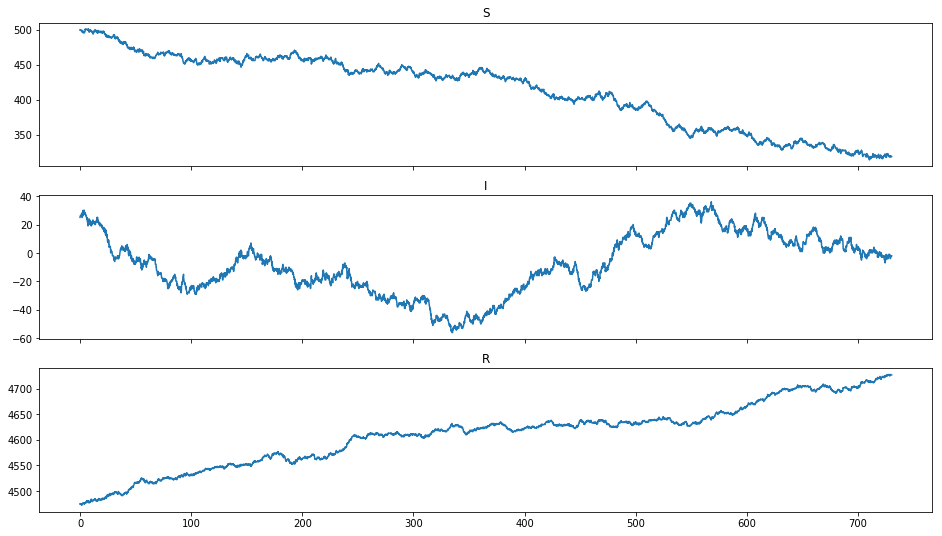